# Graph creation

### Import libraries

In [1]:
import numpy as np
import itk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Volume

### Get data

In [2]:
df = pd.read_csv("ROITable.csv")

In [3]:
df = df.drop(columns="Unnamed: 0",axis=0)

In [4]:
df

,Glande_Lacrim_D,Glande_Lacrim_G,Glnd_Submand_L,Parotid_R,Glnd_Submand_R,Parotid_L
0,905.0,948.0,9634.0,29455.0,9423.0,28533.0
1,1220.0,1044.0,8678.0,24502.0,9267.0,23600.0
2,873.0,806.0,7209.0,33928.0,7763.0,33035.0
3,848.0,805.0,13769.0,42290.0,11291.0,44164.0
4,720.0,839.0,5978.0,19689.0,7231.0,16063.0
5,828.0,926.0,8366.0,33064.0,7740.0,35419.0
6,1361.0,806.0,9215.0,28451.0,9183.0,26485.0
7,1067.0,1186.0,8974.0,26886.0,6718.0,25290.0
8,1410.0,704.0,8683.0,26183.0,9928.0,26967.0
9,1038.0,815.0,6612.0,34891.0,9278.0,35611.0


### Lacrimal glands

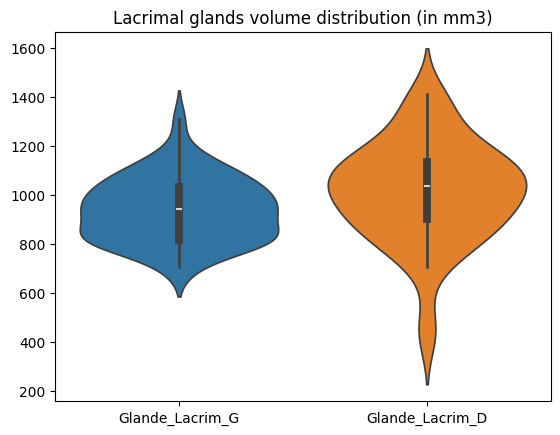

In [5]:
sns.violinplot(data=(df["Glande_Lacrim_G"], df["Glande_Lacrim_D"]))
plt.title("Lacrimal glands volume distribution (in mm3)")
plt.show()

### Submadibular glands

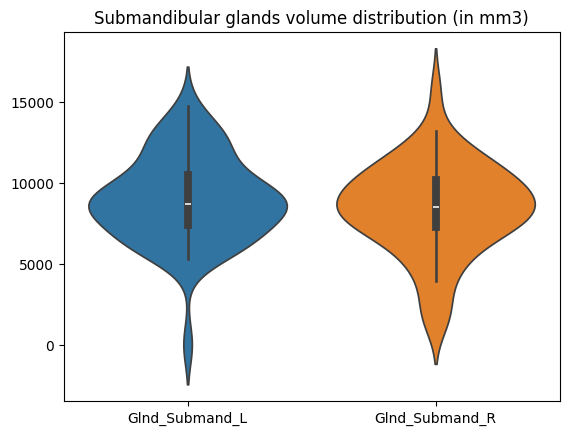

In [6]:
sns.violinplot(data=(df["Glnd_Submand_L"] ,df["Glnd_Submand_R"]))
plt.title("Submandibular glands volume distribution (in mm3)")
plt.show()

### Parotid

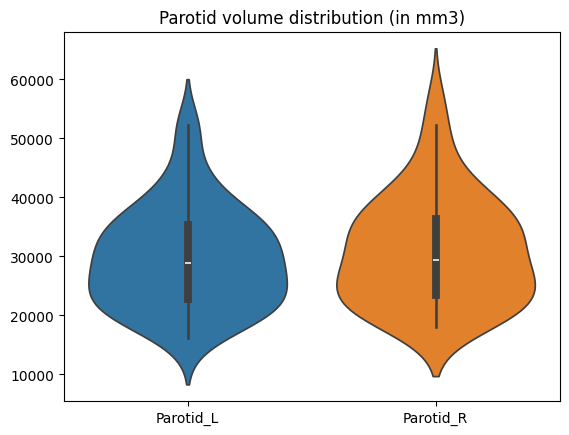

In [7]:
sns.violinplot(data=(df["Parotid_L"],df["Parotid_R"]))
plt.title("Parotid volume distribution (in mm3)")
plt.show()

### ROI volume occupation

In [8]:
per = pd.array((sum(df["Glande_Lacrim_D"]),
                sum(df["Glande_Lacrim_G"]),
                sum(df["Glnd_Submand_L"]),
                sum(df["Parotid_R"]),
                sum(df["Glnd_Submand_R"]),
                sum(df["Parotid_L"])))

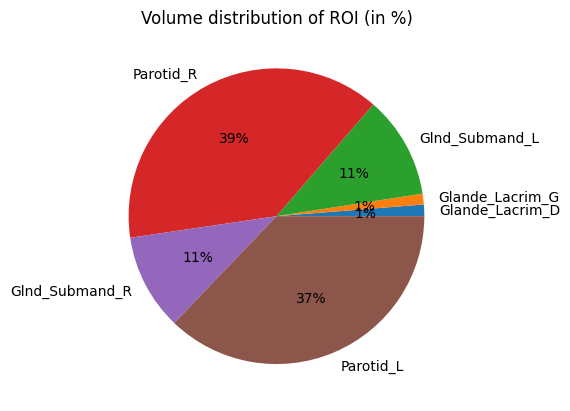

In [9]:
plt.pie(x=per, labels=df.columns, autopct='%1.0f%%')
plt.title("Volume distribution of ROI (in %)")
plt.show()

## HU

### Get data

In [12]:
density = itk.GetArrayViewFromImage(itk.imread("/home/bcatez/data/nnUNet_raw/Dataset003_glands/imagesTr/p002_psma_0000.nii.gz"))

In [13]:
density.mean()

NDArrayITKBase(-939.5175, dtype=float32)

In [14]:
densi_test = (density[density > -250])
densi_test = densi_test[densi_test < 600]

In [15]:
densi_test.mean()

NDArrayITKBase(28.850054, dtype=float32)

### Patient p002 example (only head)

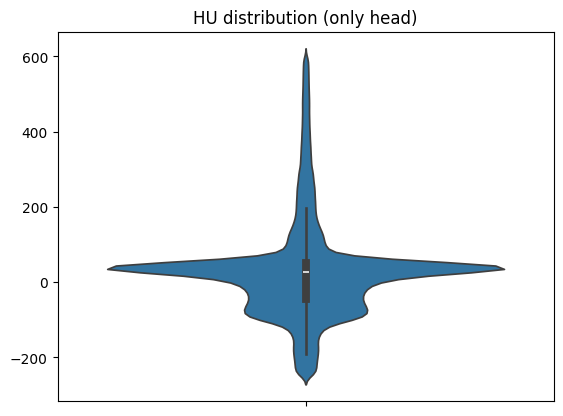

In [16]:
sns.violinplot(pd.Series(densi_test).round(0))
plt.title("HU distribution (only head)")
plt.show()

### Patient p002 example (full body)

In [17]:
densi_test02 = (density[density > -2050])

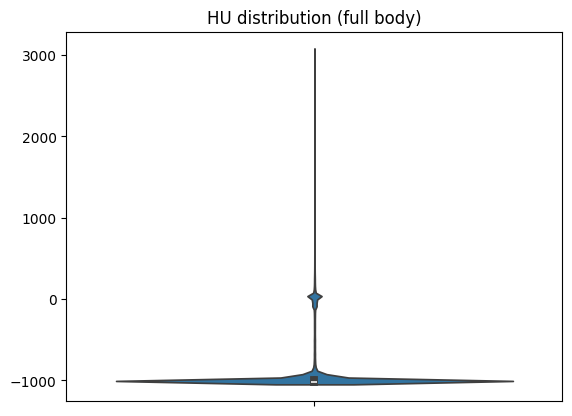

In [18]:
sns.violinplot(pd.Series(densi_test02))
plt.title("HU distribution (full body)")
plt.show()

## ROI HU

### Get data

In [19]:
label = itk.GetArrayViewFromImage(itk.imread("/home/bcatez/data/nnUNet_raw/Dataset002_glands/labelsTr/p001_psma_0000.nii.gz"))
image = itk.GetArrayViewFromImage(itk.imread("/home/bcatez/data/nnUNet_raw/Dataset002_glands/imagesTr/p001_psma_0000.nii.gz"))

### Patient p001 example

In [20]:
x= ['Glande_Lacrim_D', 'Glande_Lacrim_G', 'Glnd_Submand_L', 'Parotid_R', 'Glnd_Submand_R', 'Parotid_L']
colors = ["indianred", "darkcyan", "darkturquoise", "tomato", "orangered", "steelblue"]

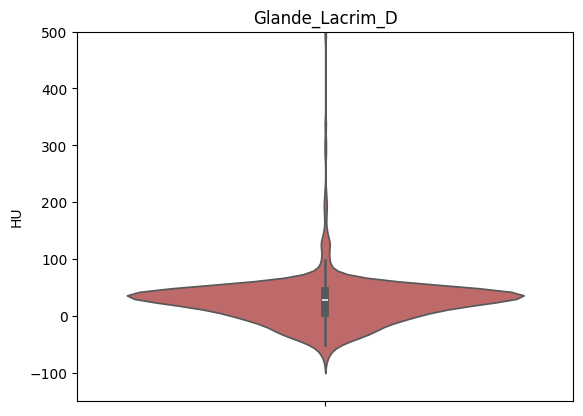

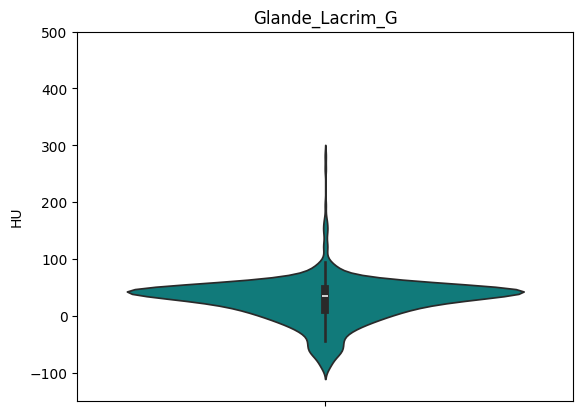

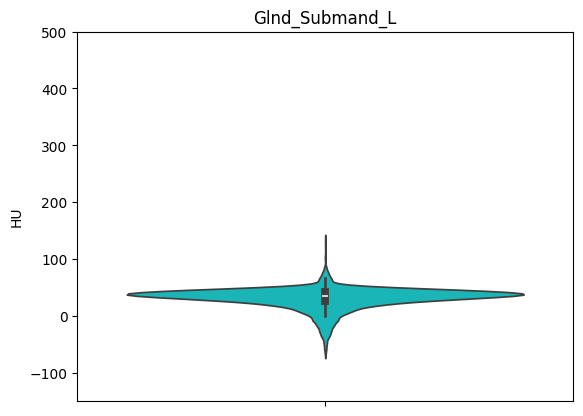

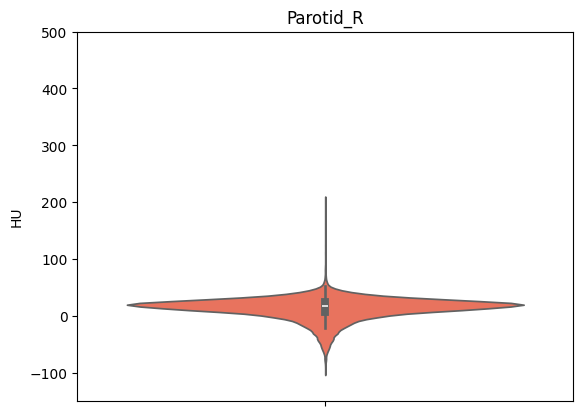

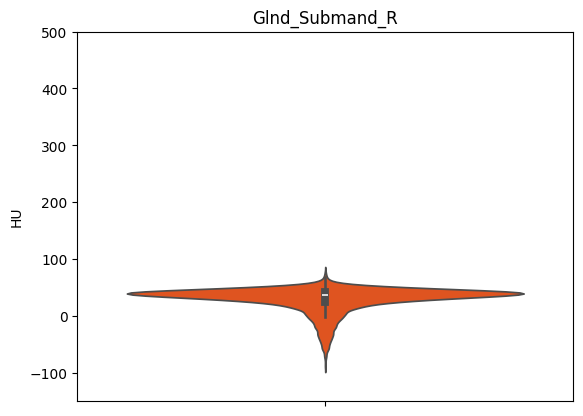

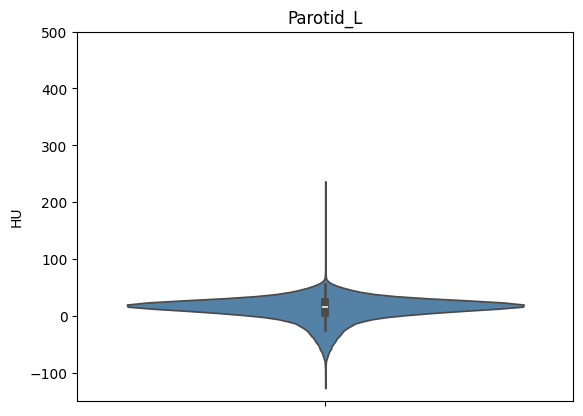

In [23]:
example = []
for i in range(6):
    index = np.where(label == i+1)
    roi = (image[index])
    plt.subplot()
    sns.violinplot(roi, color=colors[i])
    plt.ylim(-150, 500)
    plt.title(x[i])
    plt.ylabel("HU")
    plt.show()


### Mean ROI HU

In [24]:
HU_df = pd.read_csv("HUTable.csv")

In [25]:
HU_df = HU_df.drop(columns="Unnamed: 0",axis=0)

In [26]:
HU_df

,Glande_Lacrim_D,Glande_Lacrim_G,Glnd_Submand_L,Parotid_R,Glnd_Submand_R,Parotid_L
0,25.224573,27.496725,31.312786,13.441143,29.539637,12.657901
1,33.821728,37.433781,40.164761,19.233828,40.777370,18.391909
2,52.897087,37.406719,28.450460,-41.667423,18.308401,-46.926476
3,46.460835,26.824453,3.858495,-13.033391,3.765667,-4.930522
4,74.096161,59.598804,56.604580,-8.050669,53.967258,0.548365
5,60.871944,54.651947,-13.930373,-54.794731,-16.200294,-39.109543
6,22.821844,23.362665,11.471821,-32.001041,10.015938,-33.013859
7,81.410133,44.166477,58.674664,-12.695910,50.186337,2.831465
8,24.709902,18.226883,28.251677,-29.067949,26.670855,-39.442612
9,45.766609,10.744649,-9.325828,-36.410603,-0.934699,-20.839209


In [27]:
colors_2 = ["slateblue", "firebrick", "tomato", "blueviolet", "violet", "orangered"]

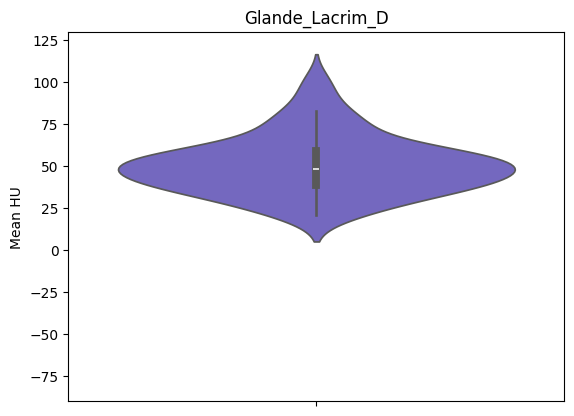

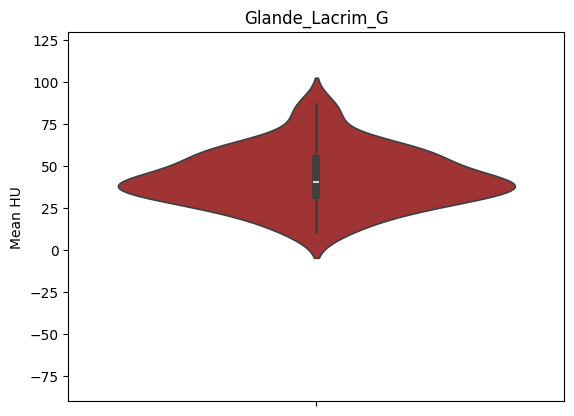

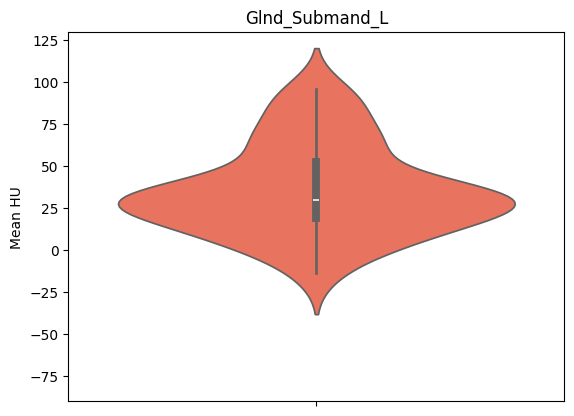

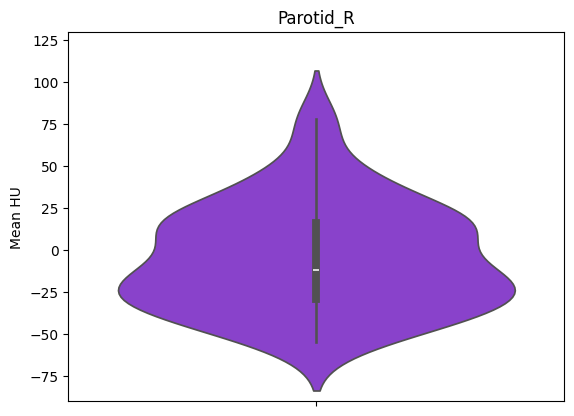

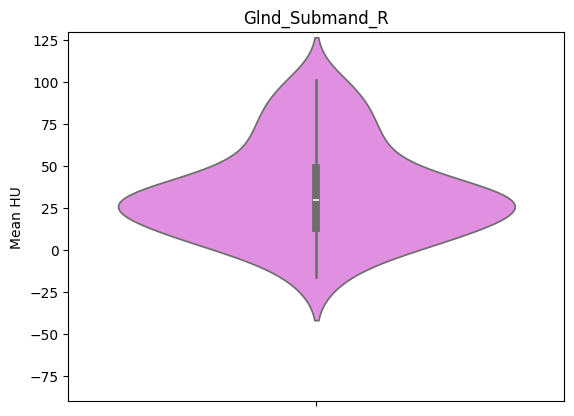

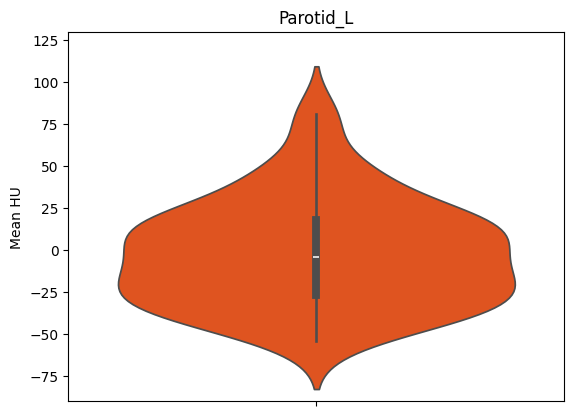

In [29]:
for i in range(6):
    plt.subplot()
    sns.violinplot(HU_df[x[i]],color=colors_2[i])
    plt.ylim(-90,130)
    plt.title(x[i])
    plt.ylabel("Mean HU")
    plt.show()